# MultiLinear Regression

# Startups problem

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [5]:
df = pd.read_csv("D:/ExcelR/A5 multi linear regression/50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
dfcopy = df.rename(columns={'R&D Spend':'RandD','Marketing Spend':'Marketing'})

In [6]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandD           50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
pd.unique(dfcopy['State'])

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
dfcopy['California'] = (dfcopy['State']=='California').astype(float)

In [9]:
dfcopy.head()

,RandD,Administration,Marketing,State,Profit,California
0,165349.20,136897.80,471784.10,New York,192261.83,0.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0


In [10]:
dfcopy['Florida'] = (dfcopy['State']=='Florida').astype(float)

In [11]:
dfcopy.head()

,RandD,Administration,Marketing,State,Profit,California,Florida
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0


In [12]:
dfcopy.drop('State',axis=1,inplace=True)

In [13]:
dfcopy.head()

,RandD,Administration,Marketing,Profit,California,Florida
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0


In [14]:
dfcopy.corr()

,RandD,Administration,Marketing,Profit,California,Florida
RandD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [15]:
model1 = smf.ols('Profit~RandD+Administration+Marketing+California+Florida',data=dfcopy).fit()

In [16]:
model1.params

Intercept         50083.456813
RandD                 0.806023
Administration       -0.027004
Marketing             0.026980
California           41.887019
Florida             240.675812
dtype: float64

In [17]:
print(model1.pvalues)

Intercept         5.757175e-09
RandD             2.578772e-21
Administration    6.077373e-01
Marketing         1.226769e-01
California        9.897941e-01
Florida           9.428623e-01
dtype: float64


In [18]:
(model1.rsquared,model1.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [19]:
model2 = smf.ols('Profit~RandD+Administration+Marketing+Florida',data=dfcopy).fit()

In [20]:
print(model2.pvalues)

Intercept         1.639196e-09
RandD             8.293975e-22
Administration    6.037292e-01
Marketing         1.184614e-01
Florida           9.398330e-01
dtype: float64


In [21]:
(model2.rsquared,model2.rsquared_adj)

(0.9507522991055133, 0.94637472569267)

In [22]:
model3 = smf.ols('Profit~RandD+Administration+Marketing',data=dfcopy).fit()

In [23]:
print(model3.pvalues)

Intercept         1.057379e-09
RandD             2.634968e-22
Administration    6.017551e-01
Marketing         1.047168e-01
dtype: float64


In [24]:
(model3.rsquared,model3.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [25]:
model4 = smf.ols('Profit~RandD+Marketing',data=dfcopy).fit()

In [26]:
print(model4.pvalues)

Intercept    3.504062e-22
RandD        6.040433e-24
Marketing    6.003040e-02
dtype: float64


In [27]:
(model4.rsquared,model4.rsquared_adj)

(0.9504503015559763, 0.9483418037498477)

In [28]:
model5 = smf.ols('Profit~RandD',data=dfcopy).fit()

In [29]:
model5.params

Intercept    49032.899141
RandD            0.854291
dtype: float64

In [30]:
print(model5.pvalues)

Intercept    2.782697e-24
RandD        3.500322e-32
dtype: float64


In [31]:
(model5.rsquared,model5.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

<AxesSubplot:xlabel='RandD', ylabel='Profit'>

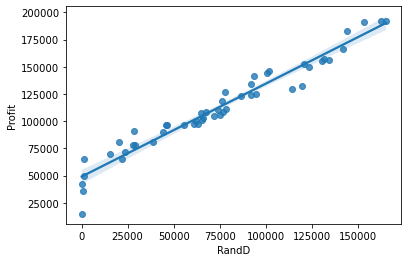

In [32]:
sns.regplot(x="RandD", y="Profit", data=dfcopy)

<AxesSubplot:xlabel='Profit'>

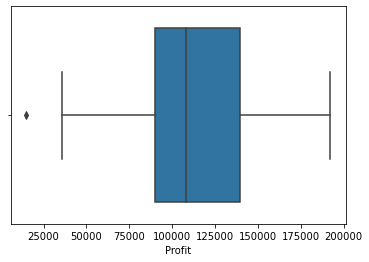

In [33]:
sns.boxplot(x=dfcopy['Profit'])

In [34]:
dfcopy['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

In [35]:
dfcopy['Profit'].sort_values()

49     14681.40
48     35673.41
47     42559.73
46     49490.75
45     64926.08
44     65200.33
43     69758.98
42     71498.49
41     77798.83
40     78239.91
39     81005.76
38     81229.06
37     89949.14
36     90708.19
35     96479.51
34     96712.80
33     96778.92
32     97427.84
31     97483.56
30     99937.59
29    101004.64
28    103282.38
27    105008.31
26    105733.54
25    107404.34
24    108552.04
23    108733.99
22    110352.25
21    111313.02
20    118474.03
19    122776.86
18    124266.90
17    125370.37
16    126992.93
15    129917.04
14    132602.65
13    134307.35
12    141585.52
11    144259.40
10    146121.95
9     149759.96
8     152211.77
7     155752.60
6     156122.51
5     156991.12
4     166187.94
3     182901.99
2     191050.39
1     191792.06
0     192261.83
Name: Profit, dtype: float64

In [36]:
dfcopy.tail()

,RandD,Administration,Marketing,Profit,California,Florida
45,1000.23,124153.04,1903.93,64926.08,0.0,0.0
46,1315.46,115816.21,297114.46,49490.75,0.0,1.0
47,0.00,135426.92,0.00,42559.73,1.0,0.0
48,542.05,51743.15,0.00,35673.41,0.0,0.0
49,0.00,116983.80,45173.06,14681.40,1.0,0.0


In [37]:
dfcopy.drop(index=49,inplace=True)

In [38]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandD           49 non-null     float64
 1   Administration  49 non-null     float64
 2   Marketing       49 non-null     float64
 3   Profit          49 non-null     float64
 4   California      49 non-null     float64
 5   Florida         49 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [39]:
model6 = smf.ols('Profit~RandD',data=dfcopy).fit()

In [40]:
model6.params

Intercept    51723.694794
RandD            0.827841
dtype: float64

In [41]:
print(model6.pvalues)

Intercept    2.221695e-27
RandD        7.555104e-34
dtype: float64


In [42]:
(model6.rsquared,model6.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

<AxesSubplot:xlabel='RandD', ylabel='Profit'>

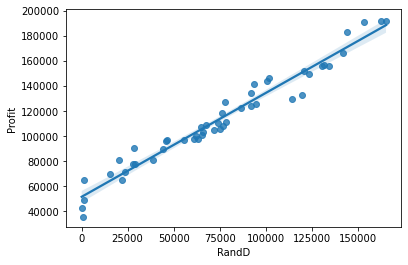

In [43]:
sns.regplot(x="RandD", y="Profit", data=dfcopy)

In [44]:
print('model1', '\n', model1.rsquared_adj)
print('model2', '\n', model2.rsquared_adj)
print('model3', '\n', model3.rsquared_adj)
print('model4', '\n', model4.rsquared_adj)
print('model5', '\n', model5.rsquared_adj)
print('model6', '\n', model6.rsquared_adj)

model1 
 0.945156175737278
model2 
 0.94637472569267
model3 
 0.9475337762901719
model4 
 0.9483418037498477
model5 
 0.9454214684987816
model6 
 0.9564319291051918


In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [46]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandD           49 non-null     float64
 1   Administration  49 non-null     float64
 2   Marketing       49 non-null     float64
 3   Profit          49 non-null     float64
 4   California      49 non-null     float64
 5   Florida         49 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [47]:
dfcopy2 = dfcopy.drop('Profit',axis=1)

In [48]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RandD           49 non-null     float64
 1   Administration  49 non-null     float64
 2   Marketing       49 non-null     float64
 3   California      49 non-null     float64
 4   Florida         49 non-null     float64
dtypes: float64(5)
memory usage: 2.3 KB


In [49]:
dfcopy2 = add_constant(dfcopy2)

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
dfcopy2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           49 non-null     float64
 1   RandD           49 non-null     float64
 2   Administration  49 non-null     float64
 3   Marketing       49 non-null     float64
 4   California      49 non-null     float64
 5   Florida         49 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB


In [51]:
variance_inflation_factor(dfcopy2.values,1)

2.4008207124931076

In [52]:
variance_inflation_factor(dfcopy2.values,2)

1.1779356634267575

In [53]:
variance_inflation_factor(dfcopy2.values,3)

2.324983002632334

In [54]:
variance_inflation_factor(dfcopy2.values,4)

1.3137077106688828

In [55]:
variance_inflation_factor(dfcopy2.values,5)

1.3484173580126628

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


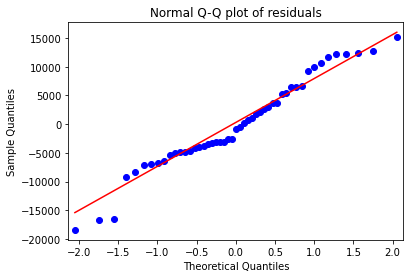

In [57]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model6.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [58]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

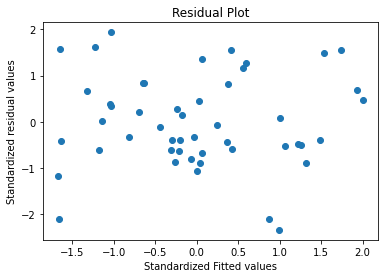

In [59]:
plt.scatter(get_standardized_values(model6.fittedvalues),
            get_standardized_values(model6.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [60]:
model_influence = model6.get_influence()
(c, _) = model_influence.cooks_distance

In [62]:
import numpy as np

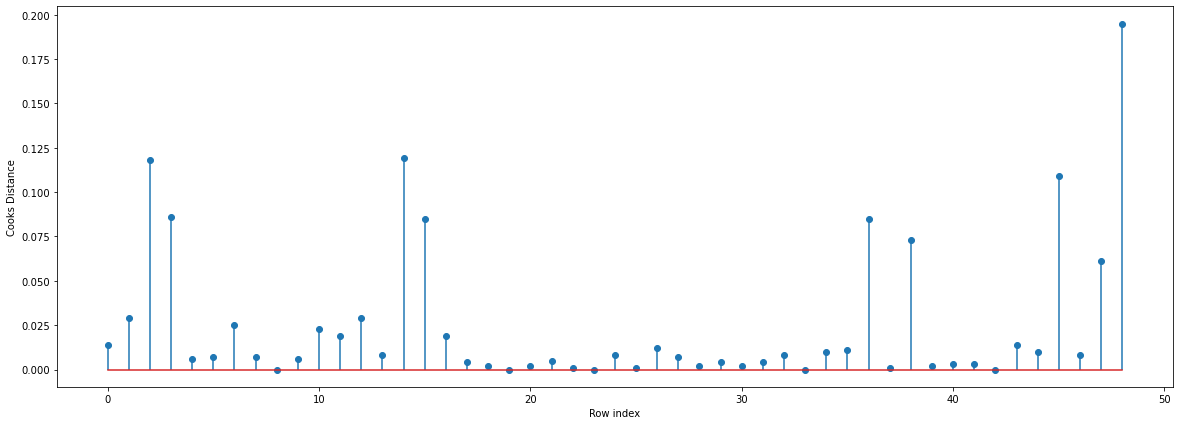

In [63]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dfcopy)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
(np.argmax(c),np.max(c))

(48, 0.19525888916998)

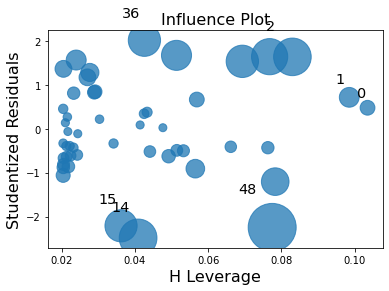

In [65]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model6)
plt.show()

In [66]:
k = dfcopy.shape[1]
n = dfcopy.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [67]:
k

6

In [68]:
n

49

In [69]:
leverage_cutoff

0.42857142857142855

In [70]:
dfcopy[dfcopy.index.isin([48])]

,RandD,Administration,Marketing,Profit,California,Florida
48,542.05,51743.15,0.0,35673.41,0.0,0.0


In [71]:
dfcopy.drop(index=48,inplace=True)

In [72]:
model7 = smf.ols('Profit~RandD',data=dfcopy).fit()

In [73]:
model7.params

Intercept    53117.192419
RandD            0.814169
dtype: float64

In [74]:
print(model7.pvalues)

Intercept    1.553763e-27
RandD        2.914455e-33
dtype: float64


In [75]:
(model7.rsquared,model7.rsquared_adj)

(0.9577780239068537, 0.9568601548613506)

<AxesSubplot:xlabel='RandD', ylabel='Profit'>

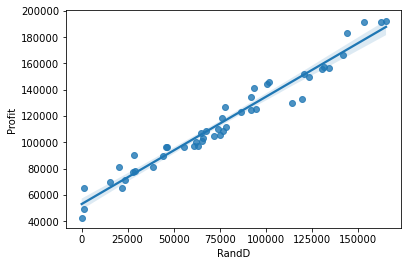

In [76]:
sns.regplot(x="RandD", y="Profit", data=dfcopy)

In [77]:
model_influence = model7.get_influence()
(c, _) = model_influence.cooks_distance

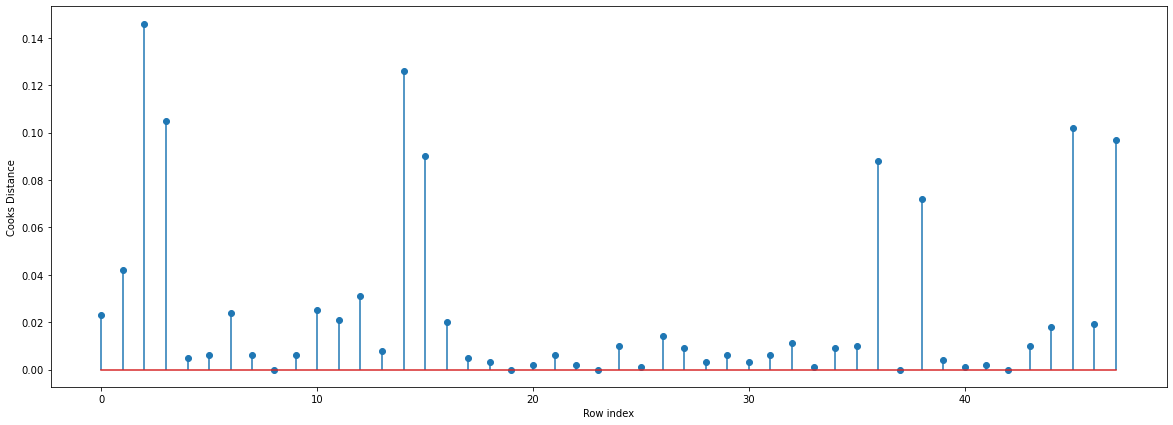

In [78]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(dfcopy)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

# Toyota Corolla

In [17]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns

In [18]:
tcdf=pd.read_csv("D:\\ExcelR\\A5 multi linear regression\\ToyotaCorolla.csv",encoding='unicode_escape')

In [19]:
tcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [20]:
tcdf.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [21]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=tcdf).fit()

In [22]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [23]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [24]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

In [25]:
m2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=tcdf).fit()

In [26]:
print(m2.pvalues)

Intercept         8.061841e-05
Age_08_04        2.111306e-288
KM                6.123589e-57
HP                2.762121e-28
cc                1.790917e-01
Gears             2.103732e-03
Quarterly_Tax     2.512611e-03
Weight            1.612185e-55
dtype: float64


In [27]:
(m2.rsquared,m2.rsquared_adj)

(0.8637625904386813, 0.8630947599996552)

In [28]:
m3 = smf.ols('Price~Age_08_04+KM+HP+Gears+Quarterly_Tax+Weight',data=tcdf).fit()

In [29]:
print(m3.pvalues)

Intercept         1.051026e-04
Age_08_04        1.605662e-288
KM                9.383988e-58
HP                6.284770e-28
Gears             1.997142e-03
Quarterly_Tax     3.998997e-03
Weight            1.789355e-55
dtype: float64


In [30]:
(m3.rsquared,m3.rsquared_adj)

(0.8635902024630112, 0.8630174531381534)

In [ ]:
# Lasso

In [31]:
from sklearn.linear_model import Lasso

In [32]:
features = ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
X = tcdf[features]
y = tcdf['Price']

In [33]:
lasso = Lasso()
lasso.fit(X,y)

Lasso()

In [34]:
lasso.score(X,y)

0.8637604933770529

In [35]:
# Ridge

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge = Ridge()
ridge.fit(X,y)

Ridge()

In [38]:
ridge.score(X,y)

0.863762360301014

In [39]:
# ElasticNet

In [40]:
from sklearn.linear_model import ElasticNet

In [41]:
elasticnet = ElasticNet()
elasticnet.fit(X,y)

ElasticNet()

In [42]:
elasticnet.score(X,y)

0.8629889015918737